In [1]:
route = 'M15'
import pandas as pd
df = pd.read_parquet(f'data/nyc_buses_with_passenger_counts_20210401_20210630_{route}_features.parquet')

# one-hot encode next_stop_id

In [2]:
# https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
df = pd.concat([df,pd.get_dummies(df['next_stop_id_cleaned'], prefix='stop_id_')],axis=1)

In [3]:
# fix vehicle_id
df['vehicle_id'] = df['vehicle_id'].astype(int)
cols = df.columns.tolist()

# train-test split

In [4]:
base_train_columns = ['vehicle_id',
 'month',
 'week',
 'day',
 'hour',
 'day_of_week',
 'is_weekend',
#  'Monday',
#  'Tuesday',
#  'Wednesday',
#  'Thursday',
#  'Friday',
#  'Saturday',
#  'Sunday',
 'day_of_week_sin',
 'day_of_week_cos',
 'hour_norm',
 'hour_cos',
 'hour_sin',
 'cluster_id',
#  'lat',
#  'lon',
 'utm_x',
 'utm_y',
 'direction',
 'next_stop_id_cleaned',
 'next_stop_d',
 'next_stop_d_along_route',
 'stop_id__401664',
 'stop_id__401665',
 'stop_id__401666',
 'stop_id__401669',
 'stop_id__401670',
 'stop_id__401675',
 'stop_id__401679',
 'stop_id__401681',
 'stop_id__401682',
 'stop_id__401685',
 'stop_id__401686',
 'stop_id__401687',
 'stop_id__401688',
 'stop_id__401689',
 'stop_id__401690',
 'stop_id__401691',
 'stop_id__401694',
 'stop_id__401696',
 'stop_id__401697',
 'stop_id__401698',
 'stop_id__401699',
 'stop_id__401701',
 'stop_id__401702',
 'stop_id__401703',
 'stop_id__401704',
 'stop_id__401706',
 'stop_id__401707',
 'stop_id__401708',
 'stop_id__401709',
 'stop_id__401710',
 'stop_id__401711',
 'stop_id__401712',
 'stop_id__401715',
 'stop_id__401716',
 'stop_id__401718',
 'stop_id__401721',
 'stop_id__401722',
 'stop_id__401723',
 'stop_id__401724',
 'stop_id__401725',
 'stop_id__401726',
 'stop_id__401727',
 'stop_id__401729',
 'stop_id__401730',
 'stop_id__401731',
 'stop_id__401732',
 'stop_id__401738',
 'stop_id__401739',
 'stop_id__401740',
 'stop_id__401741',
 'stop_id__401742',
 'stop_id__401744',
 'stop_id__401745',
 'stop_id__401746',
 'stop_id__401747',
 'stop_id__401748',
 'stop_id__401749',
 'stop_id__401753',
 'stop_id__401754',
 'stop_id__401755',
 'stop_id__401756',
 'stop_id__401758',
 'stop_id__401759',
 'stop_id__401760',
 'stop_id__401761',
 'stop_id__401762',
 'stop_id__401763',
 'stop_id__401764',
 'stop_id__401765',
 'stop_id__401768',
 'stop_id__401769',
 'stop_id__401771',
 'stop_id__401772',
 'stop_id__401775',
 'stop_id__401778',
 'stop_id__401779',
 'stop_id__401780',
 'stop_id__401781',
 'stop_id__401782',
 'stop_id__401784',
 'stop_id__401785',
 'stop_id__401786',
 'stop_id__401787',
 'stop_id__401793',
 'stop_id__401797',
 'stop_id__401802',
 'stop_id__402088',
 'stop_id__402090',
 'stop_id__402111',
 'stop_id__402112',
 'stop_id__403342',
 'stop_id__403480',
 'stop_id__403590',
 'stop_id__403647',
 'stop_id__403831',
 'stop_id__403849',
 'stop_id__403887',
 'stop_id__404105',
 'stop_id__404253',
 'stop_id__404327',
 'stop_id__404843',
 'stop_id__404844',
 'stop_id__404850',
 'stop_id__404909',
 'stop_id__404995',
 'stop_id__405084',
 'stop_id__405098',
 'stop_id__405100',
 'stop_id__405138',
 'stop_id__405233',
 'stop_id__405307',
 'stop_id__405320',
 'stop_id__405336',
 'stop_id__405337',
 'stop_id__405359',
 'stop_id__405373',
 'stop_id__405396',
 'stop_id__803002',
 'stop_id__803019',
 'stop_id__803054',
 'stop_id__803228',
 'stop_id__903054',
 'stop_id__903102',
 'stop_id__903266',
 'stop_id__904920']

In [5]:
# look at count by week #
df.groupby('week').size()

week
17      175
18    20364
19    21432
20    14642
21    18414
22    12277
23    24032
24    19278
25    20804
26     9654
dtype: int64

In [6]:
# df_test = df[ (df.month >= 4 ) &  (df.month <= 5)]
df_test = df[ (df.week >= 18 ) &  (df.week <= 23)]

df_train = df[~df.index.isin(df_test.index)]

(df_train.shape, df_test.shape)

((49911, 154), (111161, 154))

In [7]:
X_train_base = df_train[base_train_columns]
y_train_base = df_train.passenger_count

X_test_base = df_test[base_train_columns]
y_test_base = df_test.passenger_count

X_train_base.shape, y_train_base.shape, X_test_base.shape, y_test_base.shape

((49911, 144), (49911,), (111161, 144), (111161,))

In [8]:
X_train_base

,vehicle_id,month,week,day,hour,day_of_week,is_weekend,day_of_week_sin,day_of_week_cos,hour_norm,...,stop_id__405373,stop_id__405396,stop_id__803002,stop_id__803019,stop_id__803054,stop_id__803228,stop_id__903054,stop_id__903102,stop_id__903266,stop_id__904920
index,,,,,,,,,,,,,,,,,,,,,
516,6043,5,17,2,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
527,6101,5,17,2,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
1516,6043,5,17,2,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
1522,6101,5,17,2,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
2277,6101,5,17,2,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103274478,6075,7,26,1,1,2,False,0.974928,-0.222521,0.273182,...,0,0,0,0,0,0,0,0,0,0
103274764,6075,7,26,1,1,2,False,0.974928,-0.222521,0.273182,...,0,0,0,0,0,0,0,0,0,0
103275016,6075,7,26,1,1,2,False,0.974928,-0.222521,0.273182,...,0,0,0,0,0,0,0,0,0,0


# XGBoost Regression

### fit the model

In [9]:
import xgboost as xgb

# regr_base = xgb.XGBRegressor(learning_rate=0.007, max_depth=4, objective='reg:squarederror', n_estimators=200)

# based on grid search
regr_base = xgb.XGBRegressor(learning_rate=0.007, max_depth=6, objective='reg:squarederror', n_estimators=500)


eval_set_base = [(X_train_base, y_train_base), (X_test_base, y_test_base)]

regr_base.fit(X=X_train_base, y=y_train_base, eval_metric=["rmsle", "mae"], eval_set=eval_set_base, verbose=True)

[0]	validation_0-rmsle:1.58966	validation_0-mae:6.93359	validation_1-rmsle:1.60838	validation_1-mae:7.01025
[1]	validation_0-rmsle:1.55733	validation_0-mae:6.88960	validation_1-rmsle:1.57582	validation_1-mae:6.96366
[2]	validation_0-rmsle:1.52677	validation_0-mae:6.84592	validation_1-rmsle:1.54475	validation_1-mae:6.91774
[3]	validation_0-rmsle:1.49791	validation_0-mae:6.80248	validation_1-rmsle:1.51545	validation_1-mae:6.87160
[4]	validation_0-rmsle:1.47047	validation_0-mae:6.75938	validation_1-rmsle:1.48793	validation_1-mae:6.82612
[5]	validation_0-rmsle:1.44443	validation_0-mae:6.71710	validation_1-rmsle:1.46187	validation_1-mae:6.78177
[6]	validation_0-rmsle:1.41961	validation_0-mae:6.67508	validation_1-rmsle:1.43722	validation_1-mae:6.73815
[7]	validation_0-rmsle:1.39597	validation_0-mae:6.63392	validation_1-rmsle:1.41340	validation_1-mae:6.69515
[8]	validation_0-rmsle:1.37341	validation_0-mae:6.59335	validation_1-rmsle:1.39087	validation_1-mae:6.65254
[9]	validation_0-rmsle:1.351

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.007, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Mean Average Error (MAE)

In [10]:
from sklearn.metrics import mean_absolute_error
y_pred_base = regr_base.predict(X_test_base)
mae_base = mean_absolute_error(y_test_base, y_pred_base)
round(mae_base, 3)

4.2

### Feature Importance

In [11]:
# for title, val in zip(base_train_columns, regr_base.feature_importances_):
#     print(title, round(val, 3))

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print(df)
    print(pd.DataFrame(zip(base_train_columns, regr_base.feature_importances_), columns =['column', 'value']).sort_values('value', ascending=False))

                      column     value
14                     utm_y  0.204644
13                     utm_x  0.143053
0                 vehicle_id  0.073657
8            day_of_week_cos  0.048596
11                  hour_sin  0.046988
7            day_of_week_sin  0.039348
15                 direction  0.037949
2                       week  0.033853
4                       hour  0.029958
10                  hour_cos  0.027788
18   next_stop_d_along_route  0.026247
33           stop_id__401690  0.025838
3                        day  0.025728
34           stop_id__401691  0.025044
5                day_of_week  0.020754
86           stop_id__401764  0.018706
16      next_stop_id_cleaned  0.018374
117          stop_id__404253  0.014819
120          stop_id__404844  0.014466
85           stop_id__401763  0.014063
123          stop_id__404995  0.009895
71           stop_id__401745  0.008859
73           stop_id__401747  0.008680
98           stop_id__401784  0.008220
32           stop_id__401

### Plot MAE convergence

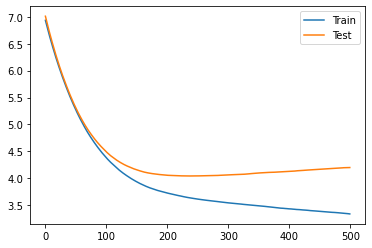

In [13]:
import matplotlib.pyplot as plt
results = regr_base.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()

# grid search

In [14]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.001, 0.007, 0.01],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [15]:
# from sklearn.model_selection import GridSearchCV

# regr_base = xgb.XGBRegressor(seed=20)
# clf = GridSearchCV(estimator=regr_base, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X_train_base, y_train_base)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))